# Project #2 -- Continuous Control

---

This notebook implements my solution for the Continous Control project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Install Python Packages

If needed, run this command to install a few packages in your computing environment.  This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

### 2. Instantiate the Unity Reacher environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment

**_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
# use the next line to load the single agent version of the Reacher environment on a Mac
env = UnityEnvironment(file_name="Reacher.app")

# use the next lineto load the "20 agents" version of the Reacher environment on a Mac
#env = UnityEnvironment(file_name="Reacher20.app")

# use the next line to load the single agent version of the Reacher environment in the Udacity Workspace
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# use the next line to load the "20 agents" version of the Reacher environment in the Udacity Workspace
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33


### 3. Import  other libraries and modules

In [6]:
import torch
import numpy as np
from collections import deque
import random
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 4. Instantiate the Agent

In [7]:
agent = Agent(state_size, action_size, 0)

### 5. Train the Agent with DDPG

Episode 100	Average Score: 0.03	Score: 0.00
Episode 200	Average Score: 0.04	Score: 0.02


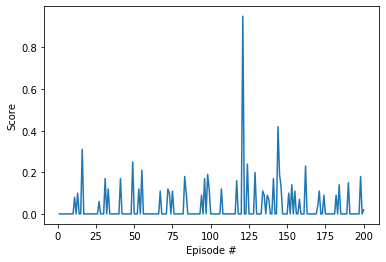

In [9]:
def ddpg(n_episodes=200, max_t=50):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    
    for i_episode in range(1, n_episodes+1):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        
        # reset the agent
        agent.reset()
        
        # reset the score
        score = 0
        
        # run an experience
        for t in range(max_t):
            # send state to the agent to get an action
            action = agent.act(state)
            
            # send action to the environment
            env_info = env.step(action)[brain_name]         # send action to the environment
            next_state = env_info.vector_observations[0]    # get next state
            reward = env_info.rewards[0]                    # get reward
            done = env_info.local_done[0]                   # see if episode finished
            
            # Save experience in replay memory, and use random sample from buffer to learn
            agent.step(state, action, reward, next_state, done)
            
            # update the score and roll over state to next time step
            score += reward
            state = next_state
            
            if done:
                break
                
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}' \
              .format(i_episode, np.mean(scores_deque), score), end="")
        
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores


scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
#env.close()